# LLP Jet Selection: Simple

For the first version of the analysis we want to look at some very simple jet properties to select CalRatio jets: $\log(\frac{HAD}{EM})$ (old-skool).

1. Look at jet $p_T$ range for our low and high mass signal samples, LLP and non-LLP jets.
1. Use J3 or J4, depending on the $p_T$ range, as a background sample
1. Look at $\log(\frac{HAD}{EM})$ for the signal and background
1. A quick optimization test to see where we should put a cut.


## Setup

In [1]:
import sys, os
sys.path.append(os.pardir)

from typing import Optional
import matplotlib.pyplot as plt

from hl_tables import histogram

from calms.data import get_ds, as_single_sample, as_samples

## Data Samples

In [2]:
def name_sample(s: dict, name: Optional[str] = None):
    n = name if name is not None else f'{s["mH"]}-{s["mS"]}'
    s.update({'name': n})
    
high_mass = as_single_sample(get_ds(tag='highmass'))
name_sample(high_mass)
low_mass = as_single_sample(get_ds(tag='lowmass'))
name_sample(low_mass)
jz3 = as_samples(get_ds(tag='jz3'))[0]
name_sample(jz3, 'JZ3')

all_samples = [low_mass, high_mass, jz3]

## Jet $p_T$

Understand what samples are best to examine this by comparing the $p_T$ spectra.

In [3]:
jz3

{'mS': nan,
 'mH': nan,
 'lifetime': nan,
 'campaign': nan,
 'tags': 'jetjet,jz3',
 'data': <hep_tables.hep_table.xaod_table at 0x2563d378a08>,
 'name': 'JZ3'}

In [4]:
def define_global_aliases(ds):
    from dataframe_expressions import define_alias
    define_alias('', 'ptgev', lambda o: o.pt / 1000.0)
    
def define_loose_jets(ds):
    'Establish loose jets as a part of the dataset'
    # TODO: Add good-jet criteria to the definition
    all_jets = ds.Jets('AntiKt4EMTopoJets')
    loose_jets = all_jets[(all_jets.ptgev > 35.0) & (abs(all_jets.eta) < 2.5)]
    ds['loose_jets'] = loose_jets
    
def define_ds(ds):
    define_global_aliases(ds)
    define_loose_jets(ds)

In [5]:
for s in all_samples:
    define_ds(s['data'])

In [6]:
def plot_pt(ds):
    histogram(ds['data'].loose_jets.ptgev, bins=100, range=(0,400))
    _ = plt.ylabel('Count')
    _ = plt.title(ds['name'])
    _ = plt.xlabel('$p_T$ [GeV]')

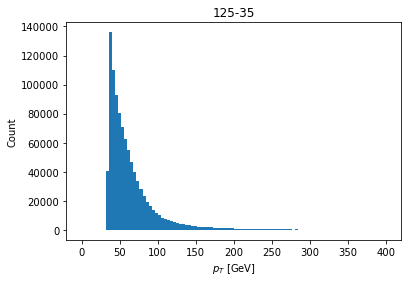

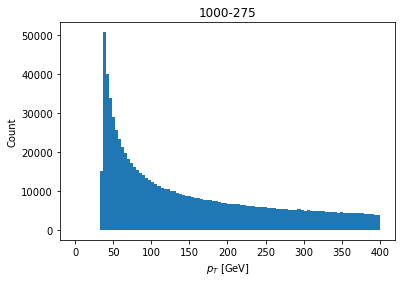

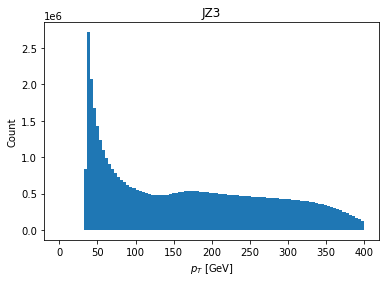

In [7]:
for s in all_samples:
    plot_pt(s)